<h1 style="background-color:Green;font-size:36pt;color:white">Polynomial regression</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

import pylab as pl # convenient for interactive calculations and plotting

from sklearn import linear_model # To model data
from sklearn.metrics import r2_score # To perform evaluation
from sklearn.preprocessing import PolynomialFeatures # To perform polynomial regression

# Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

# Take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Understanding the Data

FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

The features are:
*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [3]:
# Taking out the needed features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# Take a look at the new dataset
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Creating train and test dataset

In [4]:
# Splitting the data into train and test sets
# Taking 80% as trainning set
random_sample = np.random.rand(len(df)) < 0.8
train = cdf[random_sample]
test = cdf[random_sample]

# Polynomial Regression Model

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

The coefficients are: [ 0.         46.19800079 -0.92234068]
The constant is: [114.21940647]


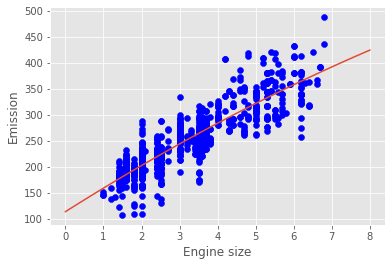

Mean absolute error: 22.83
Residual sum of squares (MSE): 911.80
R2-score: 0.77


In [26]:
# Splitting data into train and test sets
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

# Converting data into 2 degree features
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

# Performing Linear Regression
PolR = linear_model.LinearRegression()
train_y = PolR.fit(train_x_poly, train_y)

# Printing coefficients
print('The coefficients are:', PolR.coef_[0])
print('The constant is:', PolR.intercept_)

# Plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
X = np.linspace(0, 8, 100)
Y = PolR.coef_[0][2]*X**2 + PolR.coef_[0][1]*X + PolR.intercept_[0]
plt.plot(X, Y)
# Labels
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Model evaluation
test_x_poly = poly.transform(test_x)
test_y_poly = PolR.predict(test_x_poly)

print(f'Mean absolute error: {np.mean(np.absolute(test_y_poly - test_y)) :.2f}')
print(f'Residual sum of squares (MSE): {np.mean((test_y_poly - test_y) ** 2) :.2f}')
print(f'R2-score: {r2_score(test_y,test_y_poly ) :.2f}')

Using Linear Regression we got:
- Mean absolute error: 17.28
- Residual sum of squares: 560.32
- Variance score: 0.87

Comparing both, looks like Linear Regression is better to fit this data.

## Fitting using a cubic function

The coefficients are: [ 0.         36.85508327  1.80327172 -0.23974784]
The constant is: [123.65534588]


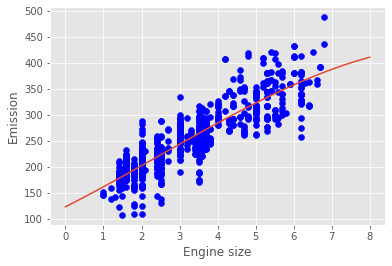

Mean absolute error: 22.84
Residual sum of squares (MSE): 911.40
R2-score: 0.77


In [33]:
# Splitting data into train and test sets
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

# Converting data into 2 degree features
poly3 = PolynomialFeatures(degree = 3)
train_x_poly3 = poly3.fit_transform(train_x)


# Performing Linear Regression
PolR3 = linear_model.LinearRegression()
train_y_poly3 = PolR3.fit(train_x_poly3, train_y)

# Printing coefficients
print('The coefficients are:', PolR3.coef_[0])
print('The constant is:', PolR3.intercept_)

# Plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
X = np.linspace(0, 8, 100)
Y = PolR3.coef_[0][3]*X**3 + PolR3.coef_[0][2]*X**2 + PolR3.coef_[0][1]*X + PolR3.intercept_[0]
plt.plot(X, Y)
# Labels
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Model evaluation
test_x_poly = poly3.transform(test_x)
test_y_poly = PolR3.predict(test_x_poly)

print(f'Mean absolute error: {np.mean(np.absolute(test_y_poly - test_y)) :.2f}')
print(f'Residual sum of squares (MSE): {np.mean((test_y_poly - test_y) ** 2) :.2f}')
print(f'R2-score: {r2_score(test_y,test_y_poly ) :.2f}')

Comparing the evaluation of Linear regression and Cubic regression, still better the Linear regression model.